In [1]:
from covid19 import get_death_data
from covid19 import get_confirm_data
from covid19 import get_recovery_data
from covid19 import get_population_data

In [2]:
import pandas as pd
from datetime import datetime
from datetime import date

In [3]:
data_deaths = get_death_data()
data_confirmed = get_confirm_data()
data_population = get_population_data()

In [4]:
def get_first_dt(dat, out_name):
    out_data = []
    for country in dat.T:
        try:
            dt = (dat.T[dat.T[country]>0]).index[0]
            dt = datetime.strptime(dt, "%m/%d/%y")
        except:
            dt = None
        out_data.append([country, dt])
    out_data = pd.DataFrame(out_data)
    out_data.columns = ['country', out_name]
    out_data.set_index('country', inplace = True)
    return out_data

In [5]:
get_first_dt(data_deaths, 'death').join(get_first_dt(data_confirmed, 'confirmed')).sort_values("confirmed")

,death,confirmed
country,,
China,2020-01-22,2020-01-22
US,2020-02-29,2020-01-22
Thailand,2020-03-01,2020-01-22
Taiwan*,2020-02-16,2020-01-22
Japan,2020-02-13,2020-01-22
...,...,...
Malawi,2020-04-07,2020-04-02
Western Sahara,NaT,2020-04-05
South Sudan,NaT,2020-04-05


In [6]:
timeline = get_first_dt(data_deaths, 'death').join(get_first_dt(data_confirmed, 'confirmed'))
timeline["discovery"] = datetime.strptime("11/17/19", "%m/%d/%y")

In [7]:
timeline['t1'] = (timeline["confirmed"] - timeline["discovery"]).apply(lambda x: x.days)
timeline['t2'] = (timeline["death"] - timeline["confirmed"]).apply(lambda x: x.days)

In [8]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B830662D08>,
      dtype=object)

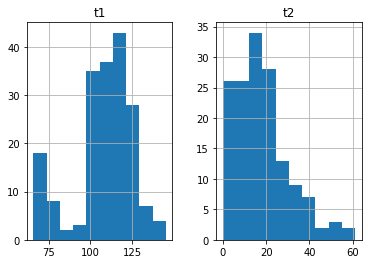

In [9]:
timeline.hist()

In [10]:
timeline.mean()

t1    107.875676
t2     18.240000
dtype: float64

In [11]:
timeline.median()

t1    110.0
t2     16.0
dtype: float64

In [12]:
timeline.corr()

,t1,t2
t1,1.000000,-0.660198
t2,-0.660198,1.000000


In [13]:
timeline.query("country == 'South Africa'")

,death,confirmed,discovery,t1,t2
country,,,,,
South Africa,2020-03-27,2020-03-05,2019-11-17,109,22.0


In [14]:
timeline.query("country == 'Italy'")

,death,confirmed,discovery,t1,t2
country,,,,,
Italy,2020-02-21,2020-01-31,2019-11-17,75,21.0


In [15]:
timeline.query("country == 'Zimbabwe'")

,death,confirmed,discovery,t1,t2
country,,,,,
Zimbabwe,2020-03-23,2020-03-20,2019-11-17,124,3.0


In [16]:
(timeline.t1+timeline.t2).describe()

count    150.000000
mean     123.380000
std       12.992858
min       66.000000
25%      117.000000
50%      125.000000
75%      132.750000
max      145.000000
dtype: float64

In [17]:
timeline = timeline[['t1', 't2']].join(data_population)

In [18]:
timeline

,t1,t2,Population,Annual_Change,Annual_Change_Absolute,Density,Land_Area,Migrants,Fert_Rate,Median_Age,Urban_Population,World_Share
country,,,,,,,,,,,,
Afghanistan,99,27.0,38928346.0,2.33,886592.0,60.0,65286.0,-6292.0,4.6,18,25,0.50
Albania,113,2.0,2877797.0,-0.11,-312.0,105.0,274.0,-14.0,1.6,36,63,0.04
Algeria,100,16.0,43851044.0,1.85,79799.0,18.0,2381740.0,-10.0,3.1,29,73,0.56
Andorra,106,20.0,77265.0,0.16,123.0,164.0,470.0,NaN,NaN,N.A.,88,0.00
Angola,124,9.0,32866272.0,3.27,1040977.0,26.0,1246700.0,6413.0,5.6,17,67,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,109,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Western Sahara,140,NaN,597339.0,2.55,14876.0,2.0,266.0,5582.0,2.4,28,87,0.01
Yemen,145,NaN,29825964.0,2.28,664042.0,56.0,52797.0,-30.0,3.8,20,38,0.38


In [19]:
timeline.query("t1 == 66")

,t1,t2,Population,Annual_Change,Annual_Change_Absolute,Density,Land_Area,Migrants,Fert_Rate,Median_Age,Urban_Population,World_Share
country,,,,,,,,,,,,
China,66,0.0,1.439324e+09,0.39,5540090.0,153.0,9388211.0,-348399.0,1.7,38,61,18.47
Japan,66,22.0,1.264765e+08,-0.30,-38384.0,347.0,364555.0,7156.0,1.4,48,92,1.62
"Korea, South",66,29.0,5.126918e+07,0.09,43877.0,527.0,9723.0,11731.0,1.1,44,82,0.66
Taiwan*,66,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thailand,66,39.0,6.979998e+07,0.25,174396.0,137.0,51089.0,19444.0,1.5,40,51,0.90
US,66,38.0,3.310027e+08,0.59,1937734.0,36.0,9147420.0,954806.0,1.8,38,83,4.25


In [20]:
flight_data = pd.read_csv("https://raw.githubusercontent.com/willkhoza/COVID_SA/master/wikipedia/countries%20by%20airline%20passengers.csv")

In [21]:
flight_data = flight_data.set_index("Country")

In [22]:
timeline.join(flight_data)

,t1,t2,Population,Annual_Change,Annual_Change_Absolute,Density,Land_Area,Migrants,Fert_Rate,Median_Age,Urban_Population,World_Share,Passengers
country,,,,,,,,,,,,,
Afghanistan,99,27.0,38928346.0,2.33,886592.0,60.0,65286.0,-6292.0,4.6,18,25,0.50,1858560.0
Albania,113,2.0,2877797.0,-0.11,-312.0,105.0,274.0,-14.0,1.6,36,63,0.04,10315.0
Algeria,100,16.0,43851044.0,1.85,79799.0,18.0,2381740.0,-10.0,3.1,29,73,0.56,6241920.0
Andorra,106,20.0,77265.0,0.16,123.0,164.0,470.0,NaN,NaN,N.A.,88,0.00,NaN
Angola,124,9.0,32866272.0,3.27,1040977.0,26.0,1246700.0,6413.0,5.6,17,67,0.42,1581200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,109,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Western Sahara,140,NaN,597339.0,2.55,14876.0,2.0,266.0,5582.0,2.4,28,87,0.01,NaN
Yemen,145,NaN,29825964.0,2.28,664042.0,56.0,52797.0,-30.0,3.8,20,38,0.38,13257.0


In [23]:
timeline.join(flight_data).to_csv('timeline.csv')


In [24]:
data_population.columns

Index(['Population', 'Annual_Change', 'Annual_Change_Absolute', 'Density',
       'Land_Area', 'Migrants', 'Fert_Rate', 'Median_Age', 'Urban_Population',
       'World_Share'],
      dtype='object')